In [ ]:
#instalar bibliotecas
!pip install gdal
!pip install rasterio
!pip install spectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 4.8 MB/s eta 0:00:00


TIFFILE

Quando plotar pelo tiffile vc perde as coordenadas

In [ ]:
import tifffile as tiff
import matplotlib.pyplot as plt
from spectral import imshow

In [ ]:
#importar imaagem
img = tiff.imread('/content/L71221071_07120010720_DN.tif')

In [ ]:
img.shape

(1233, 1520, 6)

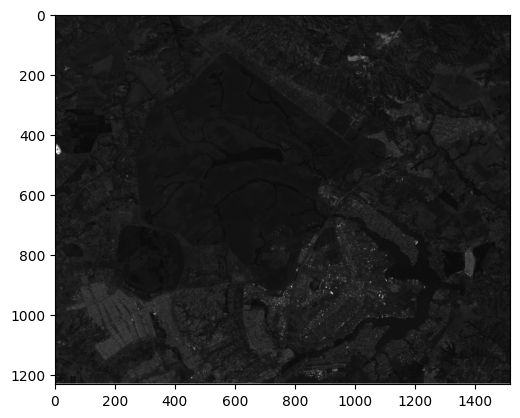

In [ ]:
plt.imshow(img[:,:,0],cmap='Greys_r')

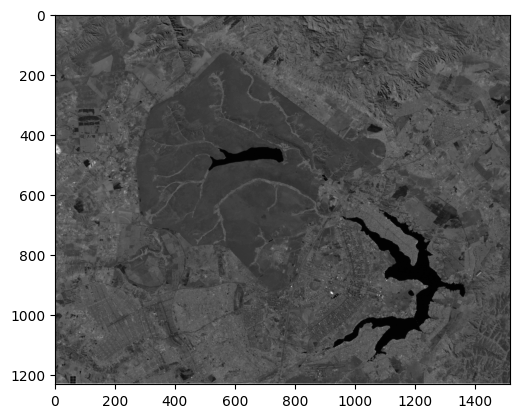

In [ ]:
plt.imshow(img[:,:,3],cmap='Greys_r')

ImageView object:
  Display bands       :  (2, 3, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

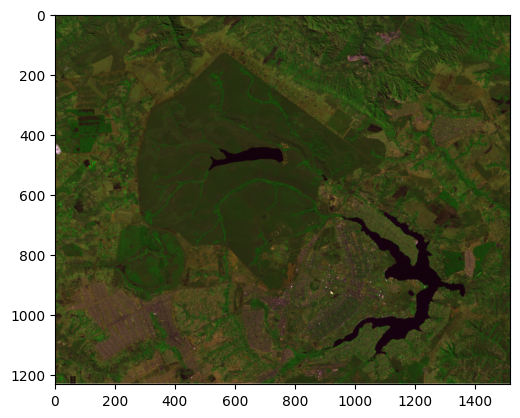

In [ ]:
imshow(img, bands=(2,3,0))

GDAL

In [ ]:
from osgeo import gdal
import numpy as np

In [ ]:
img2 = gdal.Open('/content/L71221071_07120010720_DN.tif')

In [ ]:
img3 = img2.ReadAsArray()
img3 = img.swapaxes(0,1)
img3.shape

(1520, 1233, 6)

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (2, 3, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [13.0, 255.0]

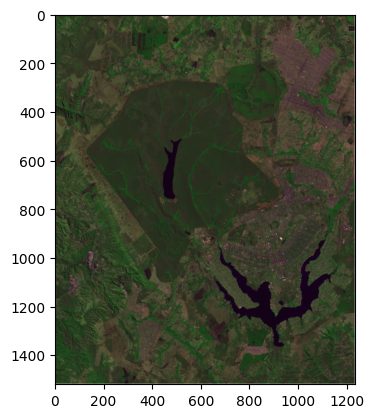

In [ ]:
imshow(img3,(2,3,1))

In [ ]:
B1 = img2.GetRasterBand(1).ReadAsArray()
B2 = img2.GetRasterBand(1).ReadAsArray()
B4 = img2.GetRasterBand(1).ReadAsArray()



In [ ]:
stack = np.dstack([B1,B2,B4])
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [40.0, 255.0]
    B: [40.0, 255.0]

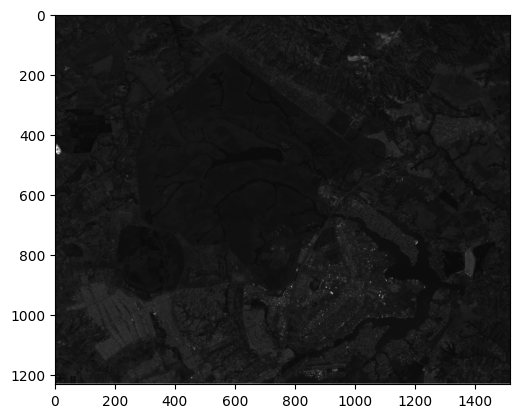

In [ ]:
imshow(stack, (1,2,0))

RASTERIO

In [ ]:
import rasterio
from rasterio.plot import show

In [ ]:
rst = rasterio.open('/content/L71221071_07120010720_DN.tif')

In [ ]:
print(rst)

<open DatasetReader name='/content/L71221071_07120010720_DN.tif' mode='r'>


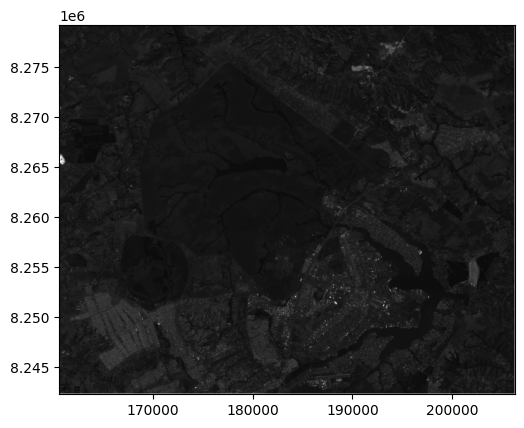

<Axes: >

In [ ]:
show(rst, cmap='Greys_r')

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

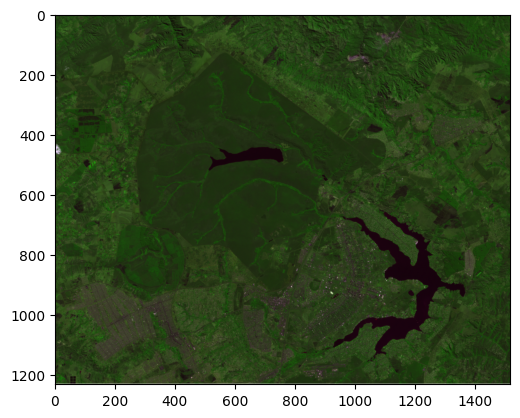

In [ ]:
B1 = rst.read(1)
B2 = rst.read(2)
B4 = rst.read(4)

stack = np.dstack([B1,B2,B4])

imshow(stack, (1,2,0))